<h1 align="center"><font size="7" face="arial" color="#D55123">DEMO</font></h1>

<h1 align="center"><font size="7" face="arial" color="#D55123">Visualize Time Series</font></h1>

<br><p><div style="text-align: justify"><font size="4.5" face="time roman">The TVB scripting interface has an interactive tool for <b>visualizing time series</b> generated in a simulation. This demonstration notebook shows an example of its use, using an example dataset for region-based simulated time series. 
    
This tool is mainly of <b>use for long simulations</b>, of at least a few seconds.</font></div></p>

<h1><font size="6" face="arial" color="#D55123">Pre-requisite</font></h1> 

---

<h1><font size="6" face="arial" color="#D55123">How to do it with TVB?</font></h1> 

---

<p><div style="text-align: justify"><font size="4.5" face="time roman">The first thing we need to do, is to import the necessary TVB modules and some additional Python packages to perform the simulation and analyze our results.</font></div></p>

In [1]:
# Online visualization.
%pylab nbagg

# Import tvb library.
from tvb.simulator.lab import * #

# Import a bunch of stuff to ease command line usage.
import numpy as np
import time as tm

Populating the interactive namespace from numpy and matplotlib


<h1><font size="6" face="arial" color="black">1. Example data</font></h1>

<p><div style="text-align: justify"><font size="4.5" face="time roman">As a simple set of example data, we are using a generic oscillatory model, with an intrinsic frequency sets at 10 Hz, and coupled through the default connectivity.</font></div></p>

In [2]:
# Initialize the Connectivity.
con = connectivity.Connectivity.from_file('connectivity_76.zip') 
nregions = len(con.region_labels)
con.weights = con.weights - con.weights * np.eye((nregions)) #remove self-connections
con.weights = con.weights / np.max(con.weights)              #normalized by maximum weight  
con.speed = np.array([np.inf])                               #no time delays => velocity ->∞
con.configure()

# Initialize the Model.
mod = models.Generic2dOscillator(a=np.array([1.7402]), #a fixed at criticality
                                 d=np.array([0.02]))   #d fixed at default value for a natural frequency 
                                                       #of the model around 10Hz
    
# Initialize the Simulator.
sim = simulator.Simulator(model=mod,
                          connectivity=con,
                          conduction_speed=np.float(con.speed),
                          coupling=coupling.Difference(a=np.array([0.0075])),
                          integrator=integrators.HeunStochastic(dt=0.1, noise=noise.Additive(nsig=np.array([0.002, 0]))),
                          monitors=(monitors.TemporalAverage(period=1),), #period in ms
                          simulation_length=60e3)
sim.configure()

WARNING  File 'hemispheres' not found in ZIP.


In [3]:
# Perform the simulation.
print("Starting simulation...")
tic = tm.time()

(time, tavg), = sim.run() 

# Finished simulation. 
print("Finished simulation.")
print("execute for " + str(tm.time()-tic))

Starting simulation...
Finished simulation.
execute for 116.66431212425232


<h1><font size="6" face="arial" color="black">2. Visualize time series</font></h1>

In [4]:
# Normalize time series.
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))
tavg -= np.mean(tavg, 0)

# Discarded first seconds to avoid initial transient dynamics.
tavg = tavg[1000:60000]

<h2><font size="5" face="arial" color="black">2.1 Standard python plot</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">The typical approach to plot times series is to simply use PyLab's <i>plot()</i> function. This is fine as a quick way to look at a small amounts of data, but it is insufficient for longer, more meaningful, time series, such as we get when trying to runs simulations aimed at generating time series comparable to experimental data like here.</font></div></p>

<IPython.core.display.Javascript object>


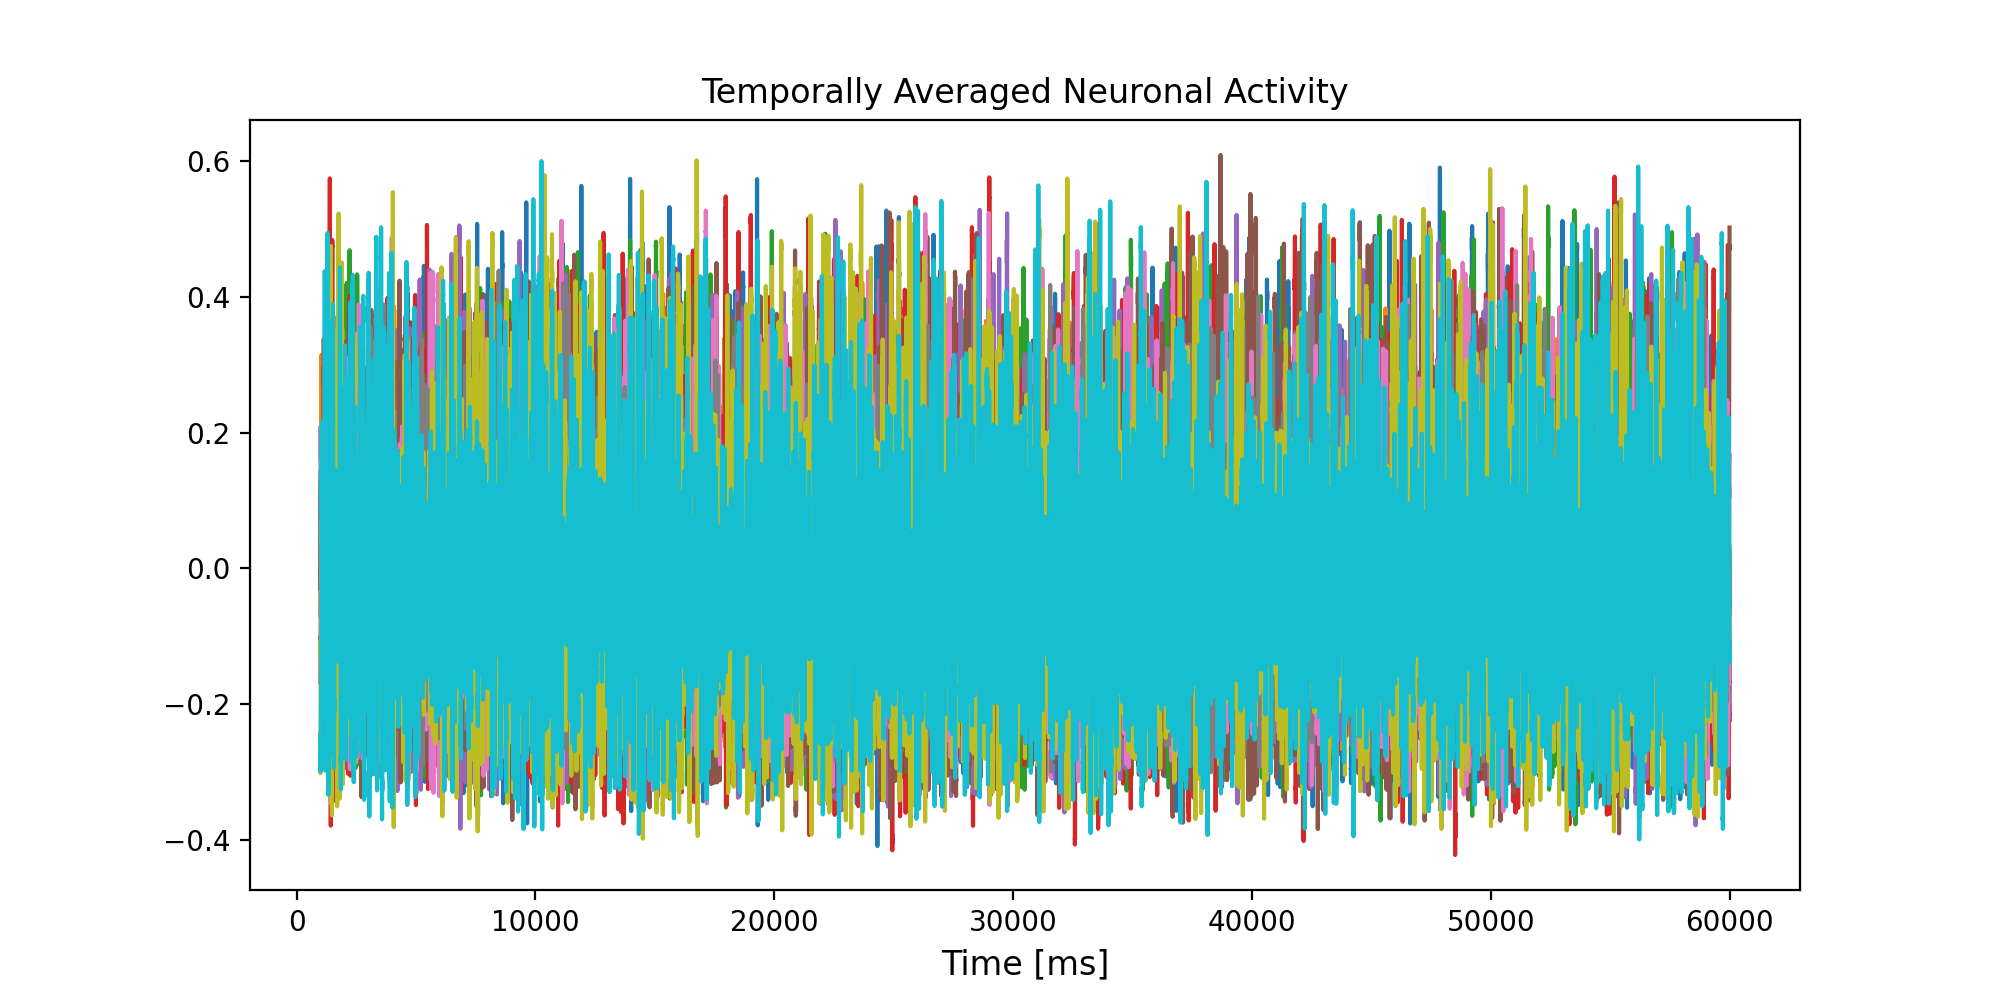

In [5]:
# Plot the temporally averaged time series.
fig1=figure(figsize=(10,5))
plot(time[1000:60000], tavg[:, 0, :10, 0])
title('Temporally Averaged Neuronal Activity', fontsize=12)
xlabel('Time [ms]', fontsize=12)

show()

<h2><font size="5" face="arial" color="black">2.2 TVB Visualizer</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman"><b>Time Series Interactive</b> viewer is a tool for <b>visualizing the time series of all nodes</b> in a (long) simulation. It is a relatively simple plot, but it adds a number of useful features compared with standard Python functions.</font></div></p>

<h3><font size="4" face="arial" color="black">Create a time series-based region datatype</font></h3>

<p><div style="text-align: justify"><font size="4.5" face="time roman">The results of the simulation are stored as a simple <b>4D-array</b>. We need to turn it into one of TVB's time series datatypes, which is what the interactive plotting tool operate on, in this case we are using <b>TimeSeriesRegion</b> (i.e., region-based simulation).</font></div></p>

In [6]:
# Import the datatype function.
from tvb.datatypes.time_series import TimeSeriesRegion 

# Build a TimeSeries Dataype.
tsr = TimeSeriesRegion(connectivity=con,
                       data=tavg,                            #in TVB 4D format
                       sample_period=sim.monitors[0].period) #in ms
tsr.configure()
tsr

<h3><font size="4" face="arial" color="black">Create and launch the Time Series Interactive GUI</font></h3>

<p><div style="text-align: justify"><font size="4.5" face="time roman">The time series are plotted in the main central panel with a constant vertical offset, the labels for each region (or channel) displayed down the left hand side. Along the bottom are three basic controls:<br>  
    
<ul>
    <li>on the left, there is a slider that allows the length of the window to be changed (in physical units);</li> 
    <li>in the middle, a set of buttons exist to step forward and backward through the time series at different speeds (at the top of the window there is an indicator showing where you are in the time-series);</li> 
    <li>and on the right, the vertical spacing, or offset between time series can be set, this has the effect of scaling the time series' amplitudes.</li>
</ul></font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">After changing a selection in these buttons, the viewer will automatically refresh.</font></div></p>

<IPython.core.display.Javascript object>


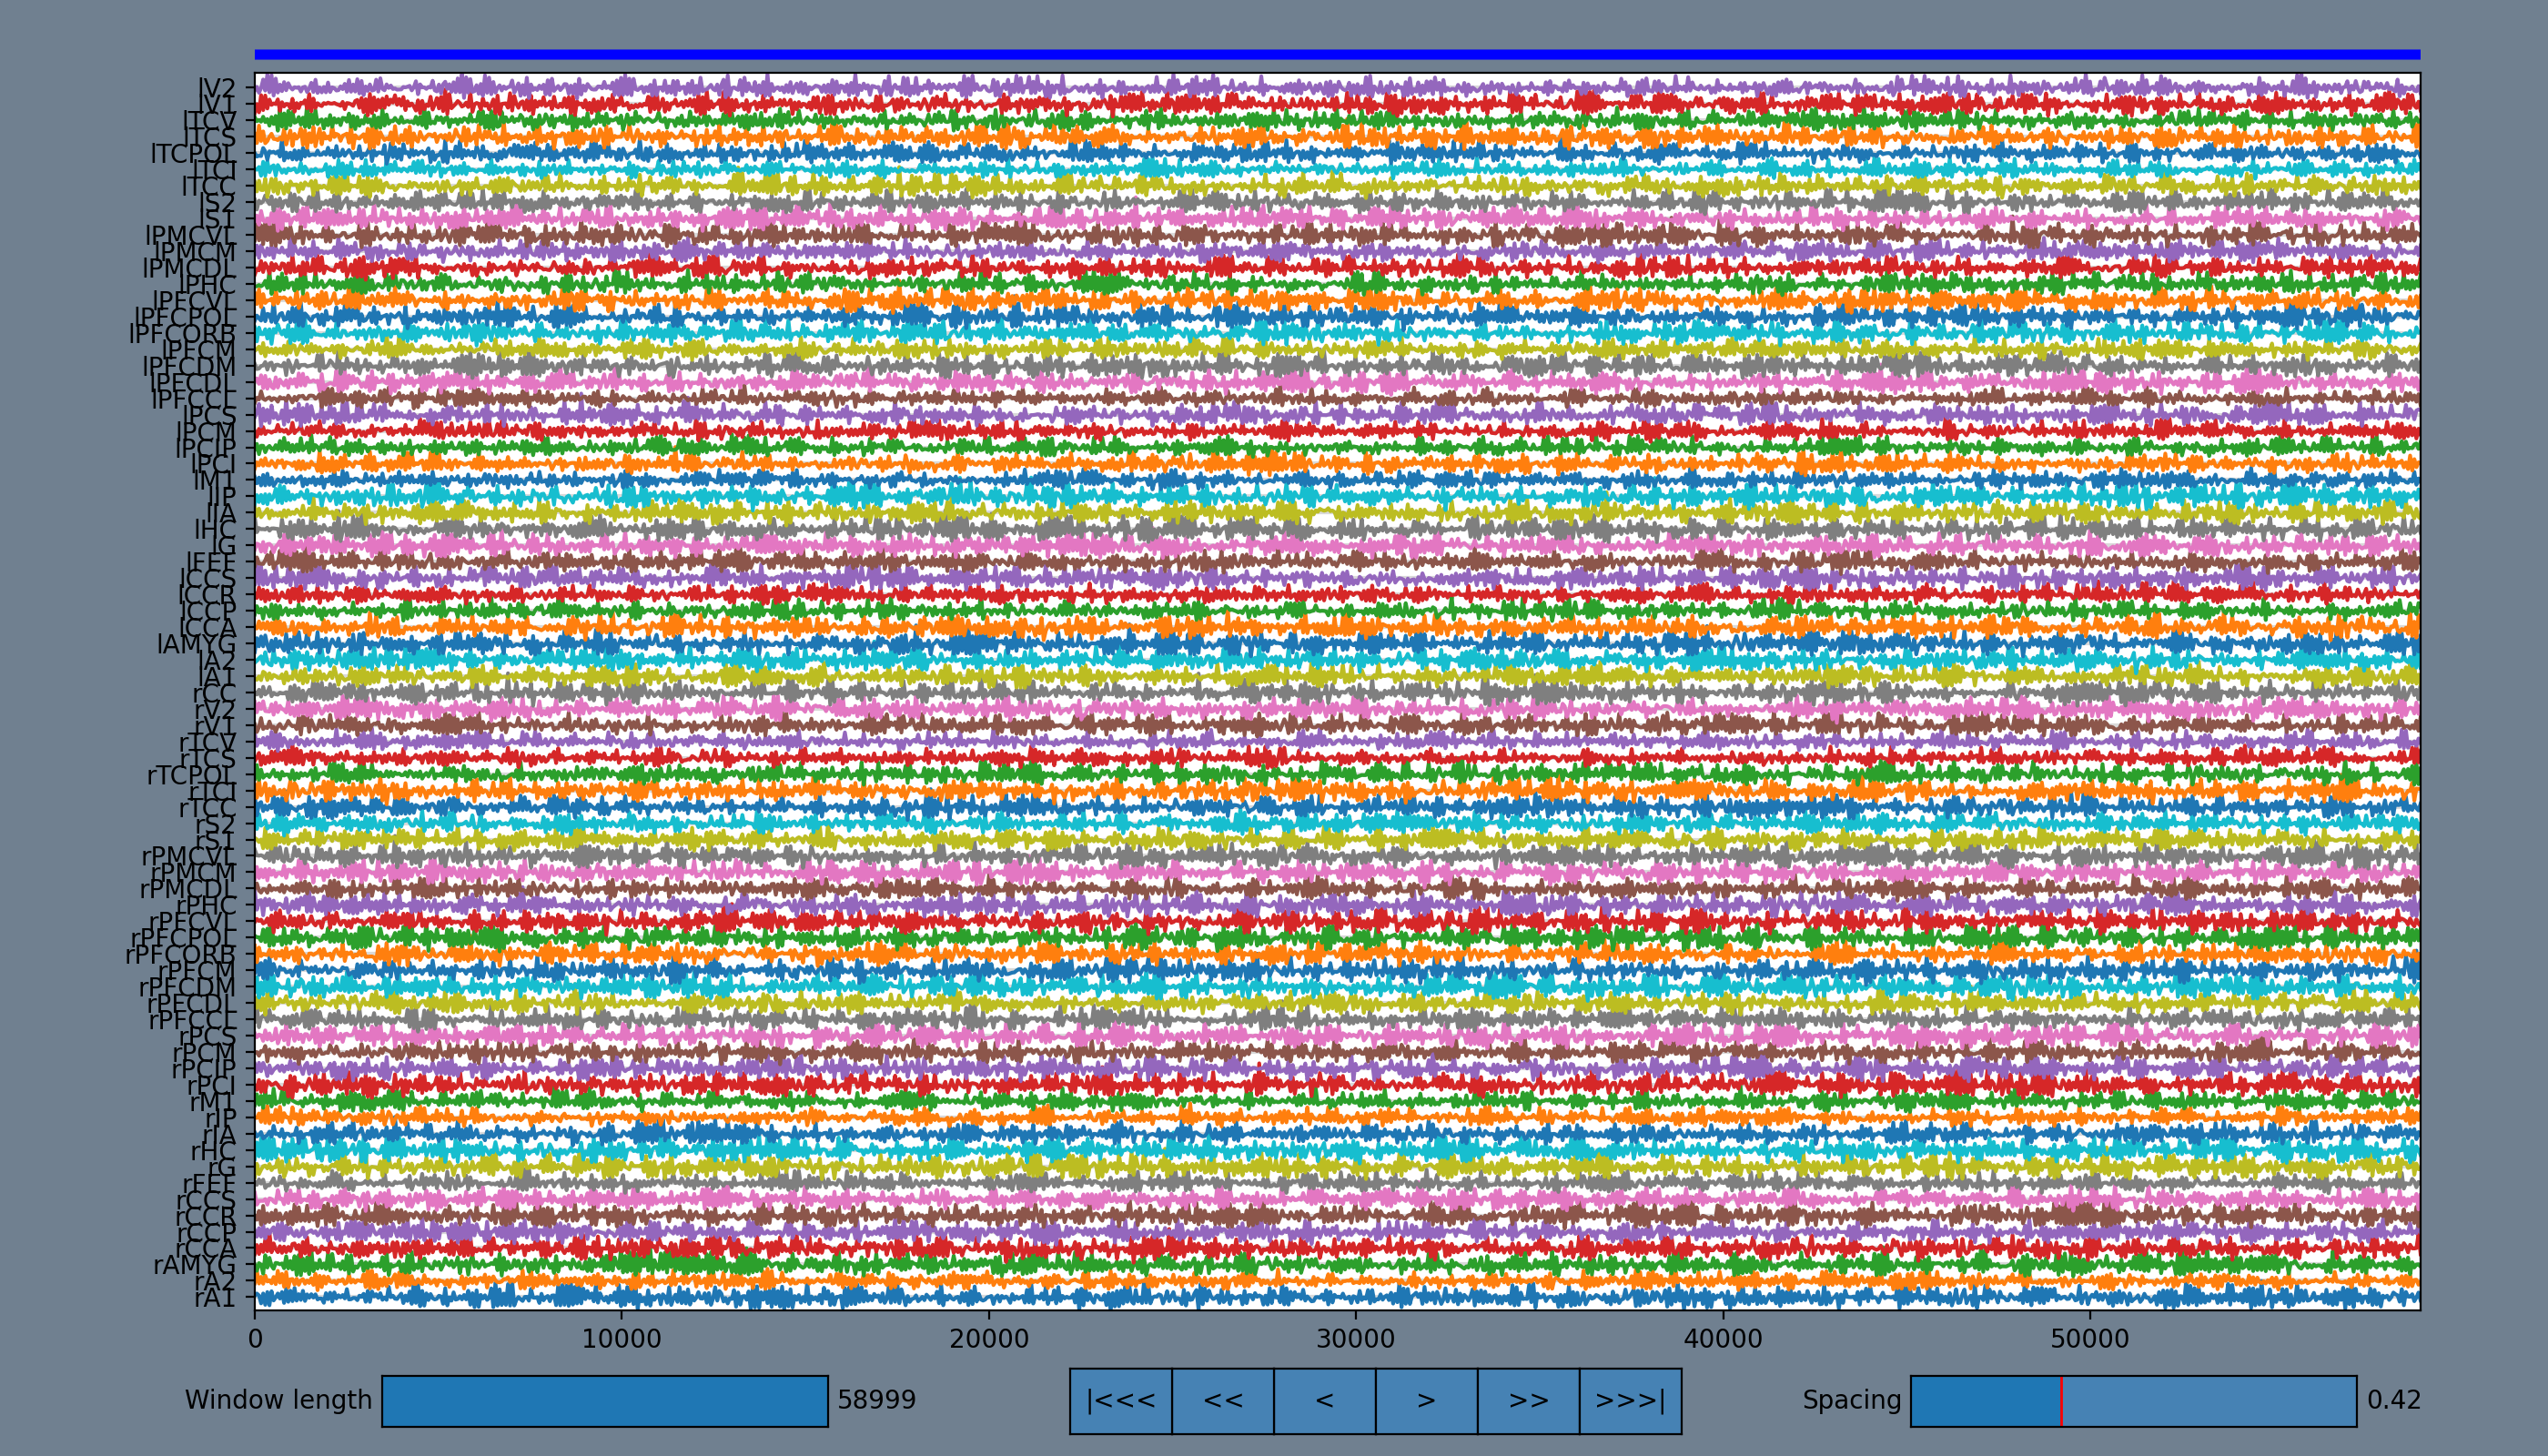

In [9]:
#Import viewer function.
import tvb.simulator.plot.timeseries_interactive as ts_int

#Create and launch the interactive visualiser.
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()

<h1><font size="6" face="arial" color="##000000">That is all folks</font></h1>

***

<p><div style="text-align: justify"><font size="4.5" face="time roman">I hope this has been a useful tutorial and welcome any comments or questions.</font></div></p>